In [1]:
import os, sys

# Ustal ścieżkę do katalogu głównego projektu (tam, gdzie masz folder src/)
project_root = os.path.abspath(os.path.join(".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print("✅ Dodano ścieżkę projektu:", project_root)


✅ Dodano ścieżkę projektu: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting


📂 Wczytuję model z egarch_ETH_5m_p1_o1_q1_ged.pkl...
📈 Wczytuję dane testowe...
✅ Dane załadowane poprawnie (train + test).
Train shape: (17279, 11), Test shape: (8927, 11)
Train range: 2024-01-01 00:05:00 → 2024-02-29 23:55:00
Test range:  2024-03-01 00:05:00 → 2024-03-31 23:55:00
📏 Używam tylko pierwszych 5000 świeczek z testu.
🔮 Rolling forecast wariancji (batch co 5, sliding window=600, scale=400)...


C:\Users\edgen\anaconda3\envs\PythonforDataScience\Lib\site-packages\arch\univariate\base.py:716: StartingValueWarning: Starting values do not satisfy the parameter constraints in the model.  The
provided starting values will be ignored.

  warnings.warn(starting_value_warning, StartingValueWarning)


🧾 Zapisano historię parametrów: evaluation_params.json


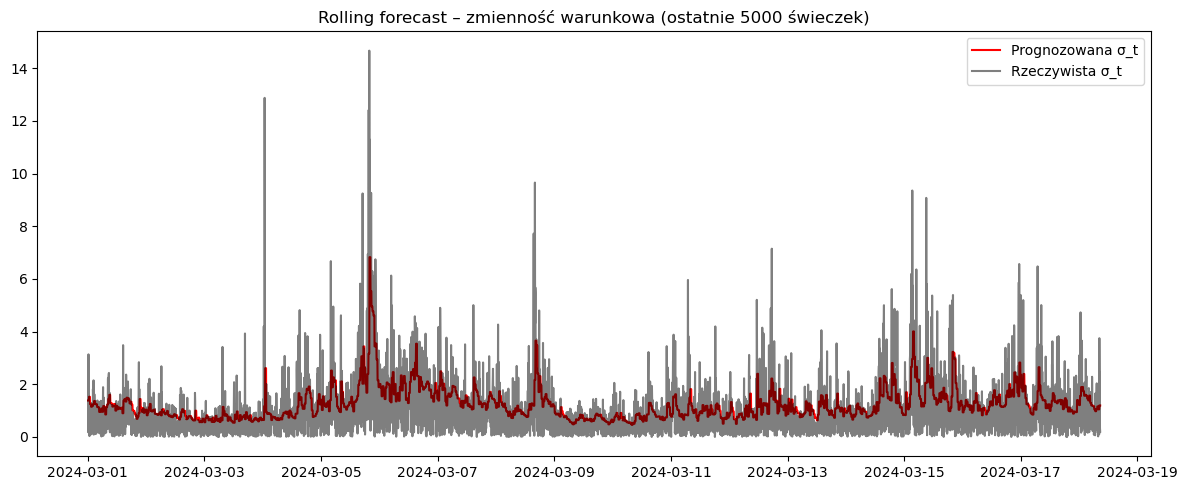

✅ Ewaluacja zakończona.

📊 Miary dokładności prognoz:
   🔹 RMSE  : 6.497602e+00
   🔹 MAE   : 2.091356e+00
   🔹 QLIKE : 1.348828e+00
   🔹 Korelacja σ_pred vs σ_real: 0.4116

🧩 Mincer–Zarnowitz test (kalibracja wariancji):
   🔸 α (const) = 0.3399
   🔸 β (slope) = 0.8531
   🔸 R² = 0.1129
   🔸 t-stat β=1 : -4.3427
   🔸 p-wartość : 0.0000


In [2]:
import sys, os
sys.path.append(os.path.abspath("../src"))

from evaluation import evaluate_egarch

evaluate_egarch(
    model_filename="egarch_ETH_5m_p1_o1_q1_t.pkl",
    n_obs=5000,
    batch_size=5, ,
    window_size=600,
    scale_window=400
)
